# ADVERTISING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Advertising - Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# BASIC CHECKS

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.shape

(200, 5)

In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# DATA PREPROCESSING

In [8]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
data.dropna()
data.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [10]:
data.loc[data["TV"]==0]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [11]:
data.loc[data["Radio"]==0]

,Unnamed: 0,TV,Radio,Newspaper,Sales
127,128,80.2,0.0,9.2,8.8


In [12]:
data.loc[data["Radio"]==0,"Radio"]=np.median(data.Radio)

In [13]:
data.head(128)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
123,124,123.1,34.6,12.4,15.2
124,125,229.5,32.3,74.2,19.7
125,126,87.2,11.8,25.9,10.6
126,127,7.8,38.9,50.6,6.6


In [14]:
data.loc[data["Newspaper"]==0]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [15]:
data.loc[data["Sales"]==0]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [17]:
duplicate_rows=data[data.duplicated()]
duplicate_rows.shape

(0, 5)

# OUTLIER DETECTION

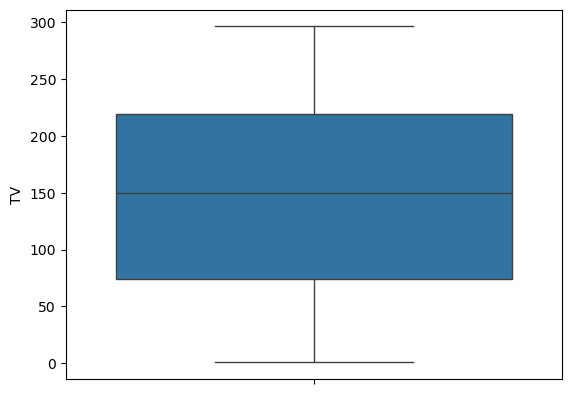

In [18]:
sns.boxplot(data.TV)
plt.show()

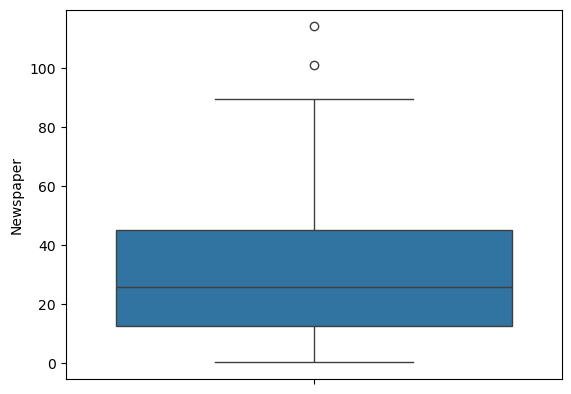

In [19]:
sns.boxplot(data.Newspaper)
plt.show()

In [20]:
Q1=data.Newspaper.quantile(0.25)
Q1

12.75

In [21]:
Q3=data.Newspaper.quantile(0.75)
Q3

45.1

In [22]:
IQR=Q3-Q1
IQR

32.35

In [23]:
upper=Q3+1.5*IQR
upper
lower=Q1-1.5*IQR
lower
data.loc[data["Newspaper"]>upper]=np.median(data.Newspaper)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3748\3955627502.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Newspaper"]>upper]=np.median(data.Newspaper)


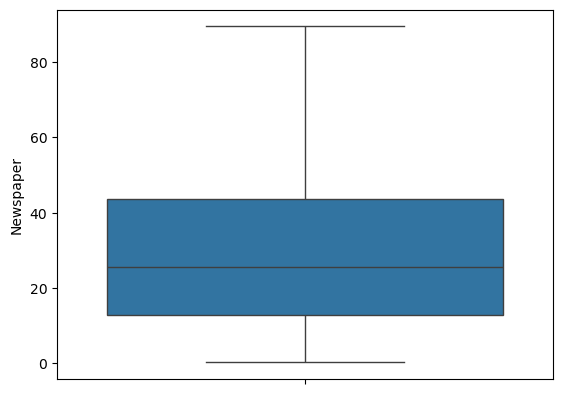

In [24]:
sns.boxplot(data.Newspaper)
plt.show()

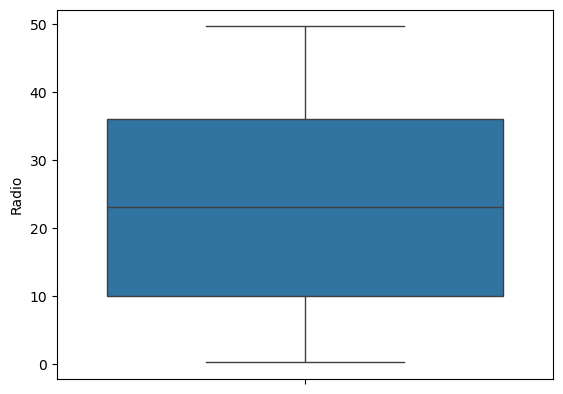

In [25]:
sns.boxplot(data.Radio)
plt.show()

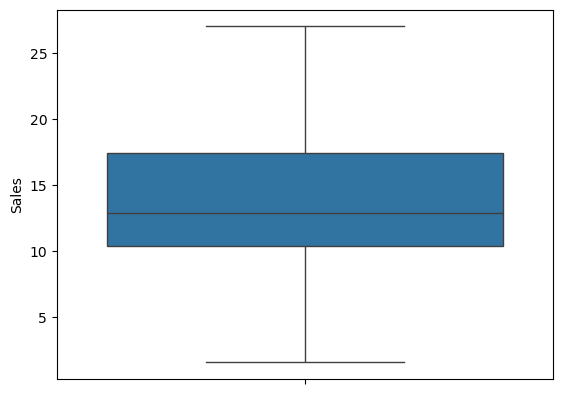

In [26]:
sns.boxplot(data.Sales)
plt.show()

# EDA

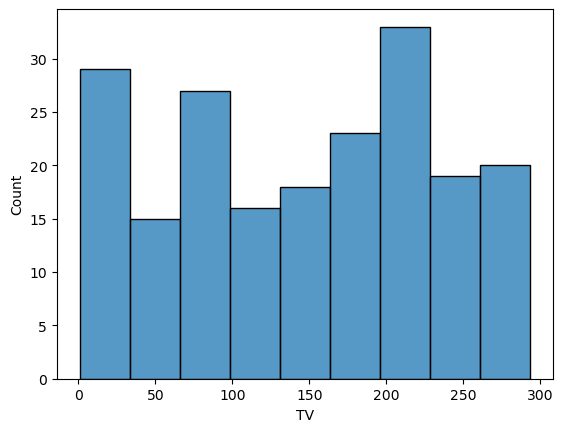

In [27]:
sns.histplot(data.TV)
plt.show()

Interpretation:
- The x-axis represents the amount spent on TV advertising.

- The y-axis shows the count (or frequency) of observations in each bin (range of TV ad spend).

- The distribution appears fairly spread out, with data points ranging from 0 to nearly 300 units.

- There are multiple peaks, especially:

   - Around 0–30

   - Around 90–100

   - Another noticeable peak between 190–210

- This suggests a multimodal distribution—TV spending is not uniform and tends to cluster in certain ranges.

Conclusion:
- The distribution of TV ad spending is not normally distributed.

- There are frequent spending levels around 0–30, 90–100, and 190–210, indicating common budgeting patterns in those ranges.

- This information can be useful for segmentation or targeted marketing strategies, especially in understanding where most companies or campaigns tend to allocate their budgets.



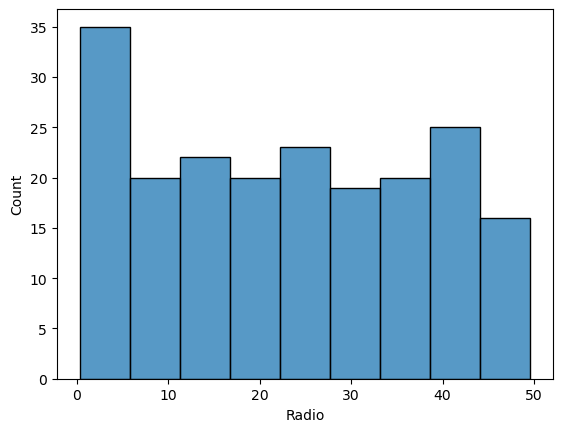

In [28]:
sns.histplot(data.Radio)
plt.show()

Interpretation:
- X-axis: Amount spent on radio advertising.

- Y-axis: Number of observations (or count) for each bin of spending.

- The spending ranges from 0 to about 50.

- There is a high concentration of observations near the lower end, particularly in the 0–5 range, which has the highest count (around 35).

- As spending increases, the frequency tends to decrease, although there are moderate peaks around 20–25 and 40–45.

- The distribution is right-skewed (positively skewed), meaning most companies spend less on radio advertising.

Conclusion:
- Most companies allocate smaller budgets (0–10 units) to radio advertising.

- Few companies spend higher amounts, leading to a longer tail on the right side of the plot.

- This suggests that radio may not be the primary advertising channel for many companies in the dataset.

- Marketers may consider investigating effectiveness vs. cost for radio ads

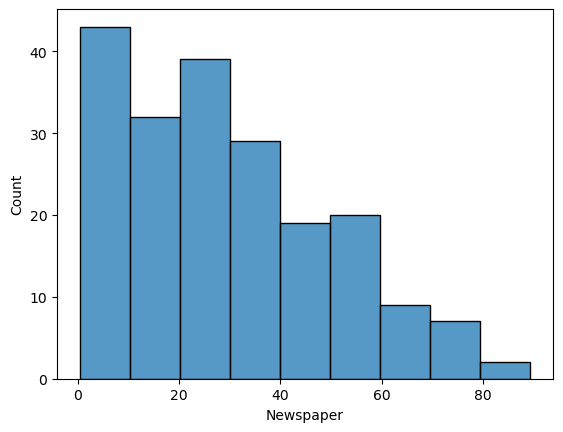

In [29]:
sns.histplot(data.Newspaper)
plt.show()

Interpretation:
- X-axis: Newspaper advertising budget (in units).

- Y-axis: Number of observations (or count) per bin.

- The data ranges from 0 to around 90.

- Most observations are clustered toward the lower end (0–30):

- The highest frequency is in the 0–10 range (over 40 observations).

- Gradual decline in frequency is observed as spending increases.

- There are fewer observations for high newspaper ad spending (above 60).

- This indicates a right-skewed (positively skewed) distribution.

Conclusion:
- The majority of companies in the dataset spend less than 30 units on newspaper advertising.

- Very few companies allocate higher budgets (60+) to newspaper ads.

- Like Radio, Newspaper seems to be a less dominant medium for advertising.

- The skewed nature suggests that most companies likely test or supplement newspaper ads rather than invest heavily.

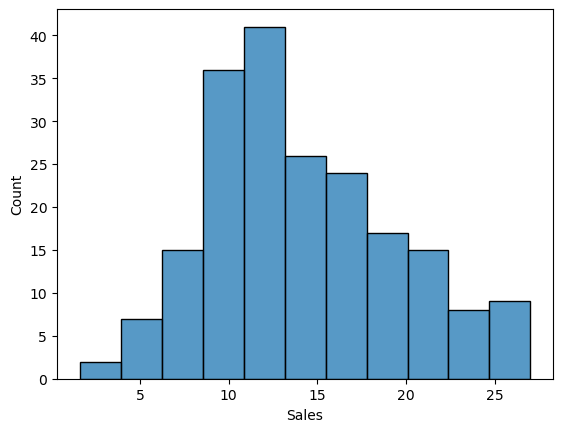

In [30]:
sns.histplot(data.Sales)
plt.show()

Interpretation:
- X-axis: Sales values (possibly in thousands of units/dollars).

- Y-axis: Count of observations (frequency) for each sales range.

- Most sales figures fall between 5 and 15, with a peak around 10–12.

- There is a gradual decline in frequency as sales increase beyond 15.

- The distribution is slightly right-skewed — meaning higher sales are less common.

Conclusion:
- Majority of the products or campaigns in the dataset result in moderate sales (10–15 units).

- High sales values (20+) are less frequent, indicating fewer high-performing campaigns.

- The distribution suggests a typical sales pattern in which:

- Most marketing campaigns lead to average outcomes.

- Only a few achieve exceptional success (higher sales).

# BIVARIATE ANALYSIS

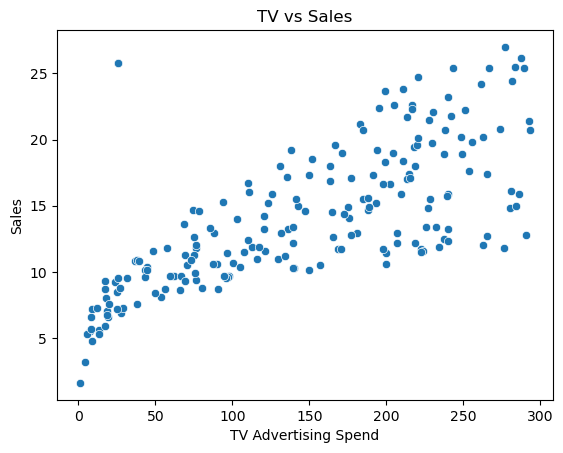

In [36]:
sns.scatterplot(x=data['TV'], y=data['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

Interpretation:
- X-axis: TV advertising spend (likely in thousands of dollars or similar unit).

- Y-axis: Corresponding product sales.

- The plot shows a clear upward trend, meaning:

- As TV spend increases, sales also increase.

- The data points are fairly concentrated around an upward-sloping pattern, although with some spread.

- This suggests a positive linear relationship between TV spend and sales

Conclusion:
- There is a strong positive correlation between TV advertising and Sales.

- Companies that invest more in TV advertising tend to achieve higher sales.

- This relationship likely indicates that TV is an effective medium for boosting sales in this dataset.

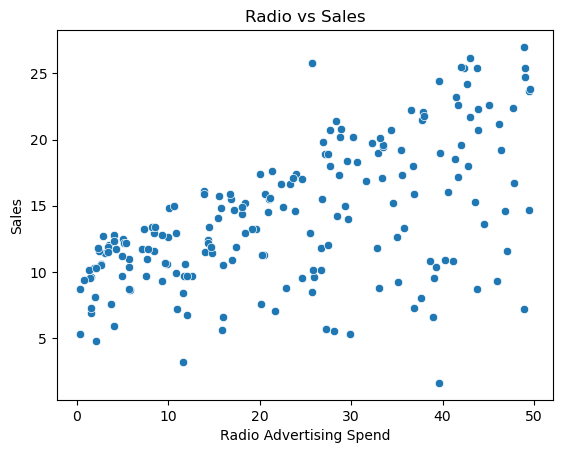

In [37]:
sns.scatterplot(x=data['Radio'], y=data['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.show()

Interpretation:
- X-axis: Radio advertising spend.

- Y-axis: Product sales.

- The data points generally show a positive trend—as radio spending increases, sales also tend to increase.

Conclusion:
- There is a moderate positive correlation between Radio ad spending and Sales.

- While sales do improve with more radio advertising, the relationship is less consistent than it was for TV ads.

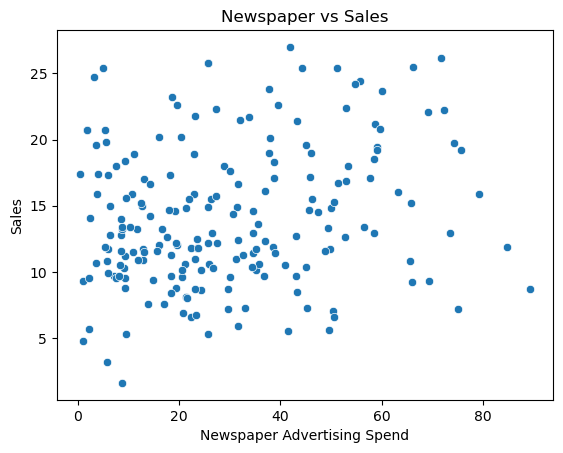

In [38]:
sns.scatterplot(x=data['Newspaper'], y=data['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.show()

Interpretation:
- X-axis: Newspaper advertising budget.

- Y-axis: Product sales.

- The plot shows no clear trend or pattern:

- Data points are widely scattered across all levels of newspaper spending.

- Higher spending does not consistently result in higher sales.

- The relationship appears to be very weak or negligible

Conclusion:
- There is little to no correlation between newspaper advertising spend and sales in this dataset.

- Increasing newspaper ad budget does not significantly improve sales.

- This suggests:

  - Newspaper ads are likely ineffective or inconsistent for driving product sales in this context.

  - Marketers should consider minimizing or reallocating this budget to more effective channels (like TV or Radio).

# MULTIVARIATE ANALYSIS

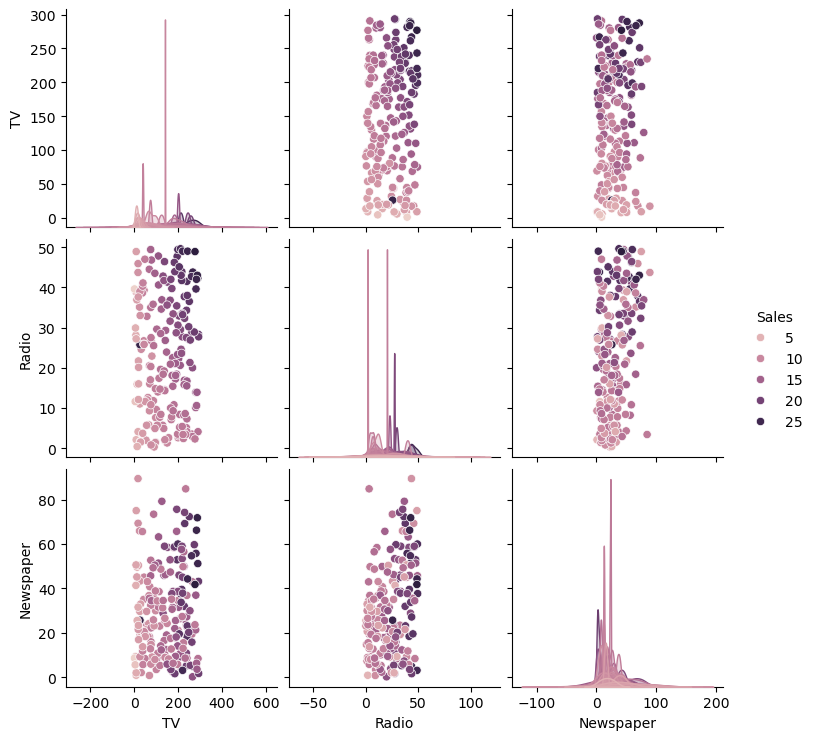

In [39]:
sns.pairplot(data[["TV","Radio","Newspaper","Sales"]],hue='Sales')
plt.show()

Interpretation:
1. Diagonal Plots (Histograms):
- Represent the distribution of each variable.

- TV and Radio show relatively normal-like distributions with some peaks.

- Newspaper has a left-skewed distribution, meaning fewer high spenders.

- Sales appears moderately right-skewed (more common at mid to lower levels).

2. Off-diagonal Scatterplots:
These show pairwise relationships between variables with colors indicating Sales level:

TV vs Sales:

- Clear positive linear trend.

- Darker points (higher sales) are concentrated at higher TV spend levels.

Radio vs Sales:

- Also a positive trend, though more scattered than TV.

Newspaper vs Sales:

- No clear pattern; points are widely dispersed, and dark (high-sales) points appear at all spend levels.

TV vs Radio:

- Appears fairly uncorrelated (TV and Radio budgets vary independently).

TV vs Newspaper and Radio vs Newspaper:

- Show no strong correlation either.

Conclusion:
- TV is the strongest predictor of Sales (linear, consistent increase).

-  Radio has a moderate effect on Sales (positive, but more scattered).

- Newspaper appears to have little to no clear effect on Sales.



# MODEL CREATION

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Step1 Independent and dependent variable creation

In [6]:
x=data[["TV","Radio","Newspaper"]]
y=data.Sales

In [7]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Model Selection

In [9]:
#step 2 Training and testing data creation

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)
#x-ind,y-dep,0.2 means 20% data,random_state use to stop random index number if we get same when we run whenever we want

In [13]:
x_train

,TV,Radio,Newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7
...,...,...,...
68,237.4,27.5,11.0
168,215.4,23.6,57.6
185,205.0,45.1,19.6
35,290.7,4.1,8.5


In [14]:
x_test

,TV,Radio,Newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3
111,241.7,38.0,23.2
81,239.8,4.1,36.9
36,266.9,43.8,5.0
126,7.8,38.9,50.6
187,191.1,28.7,18.2


In [16]:
len(x_test)

40

In [17]:
len(x_train)

160

In [18]:
y_test

135    11.6
127     8.8
191     9.9
66      9.5
119     6.6
111    21.8
81     12.3
36     25.4
126     6.6
187    17.3
85     15.2
49      9.7
155     3.2
121     7.0
50     11.4
195     7.6
24      9.7
43     12.9
9      10.6
153    19.0
44      8.5
46     10.6
103    14.7
53     21.2
159    12.9
65      9.3
179    12.6
40     16.6
92     19.4
89     16.7
144    11.4
98     25.4
14     19.0
86     12.0
145    10.3
171    14.5
63     14.0
194    17.3
174    11.5
72      8.8
Name: Sales, dtype: float64

In [19]:
len(y_test)

40

In [20]:
y_train

16     12.5
51     10.7
97     15.5
164    11.9
71     12.4
       ... 
68     18.9
168    17.1
185    22.6
35     12.8
129     9.7
Name: Sales, Length: 160, dtype: float64

In [21]:
len(y_train)

160

# Linear Regression #

In [22]:
from sklearn.linear_model import LinearRegression  # LR for continuous data

In [23]:
LR=  LinearRegression()

In [24]:
LR.fit(x_train,y_train)

LinearRegression()

In [25]:
y_predict=LR.predict(x_test)
y_predict                   # predicted value

array([13.95446559,  6.56096843,  8.37730268,  8.96942642,  6.81536408,
       21.0724867 , 14.61616898, 23.29712852, 10.61869678, 17.01582341,
       15.20861013,  8.17851346,  5.27853174,  7.88197539, 12.60600345,
        5.34954895,  8.12465182, 13.92041312, 12.501818  , 18.19974255,
        8.91614106,  8.87644672, 14.70561647, 19.95309416, 12.38660642,
        7.79536974, 12.33553347, 16.34015654, 19.16036183, 16.93591248,
       10.0968486 , 24.0871139 , 18.4187788 , 11.56426295,  9.65330308,
       14.35933948, 13.15512731, 16.42132385, 13.67471724, 10.34934211])

In [26]:
y_test #Actual value

135    11.6
127     8.8
191     9.9
66      9.5
119     6.6
111    21.8
81     12.3
36     25.4
126     6.6
187    17.3
85     15.2
49      9.7
155     3.2
121     7.0
50     11.4
195     7.6
24      9.7
43     12.9
9      10.6
153    19.0
44      8.5
46     10.6
103    14.7
53     21.2
159    12.9
65      9.3
179    12.6
40     16.6
92     19.4
89     16.7
144    11.4
98     25.4
14     19.0
86     12.0
145    10.3
171    14.5
63     14.0
194    17.3
174    11.5
72      8.8
Name: Sales, dtype: float64

# Model Evaluation

In [27]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [31]:
root_mean_squared_error(y_test,y_predict) 

1.431278313830164

In [30]:
r2_score(y_test,y_predict)

0.9200846680148507

In [32]:
x_test.shape

(40, 3)

In [33]:
## calculation of adjusted r2 score

In [34]:
adjusted_r2=1-(1-0.89)*(40-1)/(40-3-1)
adjusted_r2

0.8808333333333334

In [35]:
import math

In [38]:
print(math.sqrt(mean_squared_error(y_test,y_predict)))
                                            # root mean squared error

1.431278313830164


In [39]:
print(mean_absolute_error(y_test,y_predict))

1.1458629205525592


In [40]:
print(mean_squared_error(y_test,y_predict))

2.048557611640517
